**Problem Statement:** I plan to showcase the relationship between and create a model that will predict psychological disorders (depression, anxiety, substance abuse, etc.) using early childhood trauma ( & demographic information) as a predictor.

**Approach:** Have data for 2009 - 2012. Will use data from 2009 to 2011 to train my model and then test it on data from 2012. Will create different models for different disorders. Will look at General Health Status, Physical Health Status, Mental Health Status, Smokiing Behaviors, Activity Limitation Due to Health Problems, binge drinking...

**Objectives:** Build a predictive model; start and explore a narrative about how ACE affects an individual into adulthood (correlation to psychological disorders; trends over time and forecasting) and start thinking about solutions to mitigate those adverse affects (create a website?)

**Goals/ Success Metrics:** Will look at sensitivity (since we're talking about health and mental illness I want to increase the chance that someone will be diagnosed if they do have something that should be addressed)

**Risks/Assumptions:** All ACE questions are correlated to each other and different questions asked in different years. ACE questions were included as an optional module in the BRFSS from 2009 through 2012 and then as state-added questions thereafter(so if I want data past 2012 then I have to contact individual state health departments to establish data use agreements that would allow me to use the data). Does look like for 2019 ACE is back on the BRFSS (but data may not be released until November)

**Proposed Models:** Logistic Regression (want my model to be interpretable), decision trees, regularization (lasso, elasticnet)...then possible a neural net when features have been decreased to see about increasing specificity; time series

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# just checking to see how my pickle file reads into the notebook
brfss_2009 = pd.read_csv('./csv_data/brfss_2009.csv')
brfss_2010 = pd.read_csv('./csv_data/brfss_2010.csv')
brfss_2011 = pd.read_csv('./csv_data/brfss_2011.csv')
brfss_2012 = pd.read_csv('./csv_data/brfss_2012.csv')
brfss_total = pd.read_csv('./csv_data/brfss_total.csv')

In [10]:
brfss_2009.drop(columns='Unnamed: 0', inplace=True)
brfss_2010.drop(columns='Unnamed: 0', inplace=True)
brfss_2011.drop(columns='Unnamed: 0', inplace=True)
brfss_2012.drop(columns='Unnamed: 0', inplace=True)
brfss_total.drop(columns='Unnamed: 0', inplace=True)

In [11]:
brfss_0910 = pd.concat([brfss_2009, brfss_2010], ignore_index=True)

In [12]:
brfss_1112 = pd.concat([brfss_2011, brfss_2012], ignore_index=True)

In [13]:
brfss_0910.shape

(36418, 31)

In [14]:
brfss_1112.shape

(81137, 31)

In [15]:
brfss_0910.isna().sum()

_STATE      0
DISPCODE    0
PHYSHLTH    0
MENTHLTH    0
USENOW3     0
HISPANC2    0
MARITAL     0
CHILDREN    0
EMPLOY      0
RENTHOM1    0
SEX         0
QLACTLM2    0
ACEDEPRS    0
ACEDRINK    0
ACEDRUGS    0
ACEPRISN    0
ACEDIVRC    0
ACEPUNCH    0
ACEHURT     0
ACESWEAR    0
ACETOUCH    0
ACETTHEM    0
ACEHVSEX    0
MSCODE      0
_IMPAGE     0
_RFHLTH     0
_SMOKER3    0
_PRACE      0
_EDUCAG     0
_INCOMG     0
_TOTINDA    0
dtype: int64

In [16]:
brfss_1112.isna().sum()

_STATE      0
DISPCODE    0
PHYSHLTH    0
MENTHLTH    0
USENOW3     0
HISPANC2    0
MARITAL     0
CHILDREN    0
EMPLOY      0
RENTHOM1    0
SEX         0
QLACTLM2    0
ACEDEPRS    0
ACEDRINK    0
ACEDRUGS    0
ACEPRISN    0
ACEDIVRC    0
ACEPUNCH    0
ACEHURT     0
ACESWEAR    0
ACETOUCH    0
ACETTHEM    0
ACEHVSEX    0
MSCODE      0
_IMPAGE     0
_RFHLTH     0
_SMOKER3    0
_PRACE      0
_EDUCAG     0
_INCOMG     0
_TOTINDA    0
dtype: int64

In [17]:
# 1: Male; 2: Female
brfss_1112['SEX'].value_counts(normalize=True)

2.0    0.595191
1.0    0.404809
Name: SEX, dtype: float64

In [18]:
# 1: Male; 2:Female
brfss_0910['SEX'].value_counts(normalize=True)

2.0    0.617936
1.0    0.382064
Name: SEX, dtype: float64

In [19]:
brfss_total.shape

(117555, 31)

In [20]:
brfss_total.isna().sum()

_STATE      0
DISPCODE    0
PHYSHLTH    0
MENTHLTH    0
USENOW3     0
HISPANC2    0
MARITAL     0
CHILDREN    0
EMPLOY      0
RENTHOM1    0
SEX         0
QLACTLM2    0
ACEDEPRS    0
ACEDRINK    0
ACEDRUGS    0
ACEPRISN    0
ACEDIVRC    0
ACEPUNCH    0
ACEHURT     0
ACESWEAR    0
ACETOUCH    0
ACETTHEM    0
ACEHVSEX    0
MSCODE      0
_IMPAGE     0
_RFHLTH     0
_SMOKER3    0
_PRACE      0
_EDUCAG     0
_INCOMG     0
_TOTINDA    0
dtype: int64

In [21]:
brfss_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117555 entries, 0 to 117554
Data columns (total 31 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    117555 non-null  float64
 1   DISPCODE  117555 non-null  float64
 2   PHYSHLTH  117555 non-null  float64
 3   MENTHLTH  117555 non-null  float64
 4   USENOW3   117555 non-null  float64
 5   HISPANC2  117555 non-null  float64
 6   MARITAL   117555 non-null  float64
 7   CHILDREN  117555 non-null  float64
 8   EMPLOY    117555 non-null  float64
 9   RENTHOM1  117555 non-null  float64
 10  SEX       117555 non-null  float64
 11  QLACTLM2  117555 non-null  float64
 12  ACEDEPRS  117555 non-null  float64
 13  ACEDRINK  117555 non-null  float64
 14  ACEDRUGS  117555 non-null  float64
 15  ACEPRISN  117555 non-null  float64
 16  ACEDIVRC  117555 non-null  float64
 17  ACEPUNCH  117555 non-null  float64
 18  ACEHURT   117555 non-null  float64
 19  ACESWEAR  117555 non-null  float64
 20  ACET

Going to do some EDA for questions with no null values

In [22]:
#results_df2.groupby(by = 'class')['sample_size'].mean()
brfss_total.groupby(['ACEDEPRS', 'SEX']).size()

ACEDEPRS  SEX
0.0       1.0     1036
          2.0     1613
1.0       1.0     5718
          2.0    12273
2.0       1.0    40005
          2.0    56910
dtype: int64

In [23]:
brfss_total['ACEDEPRS'].value_counts()

2.0    96915
1.0    17991
0.0     2649
Name: ACEDEPRS, dtype: int64

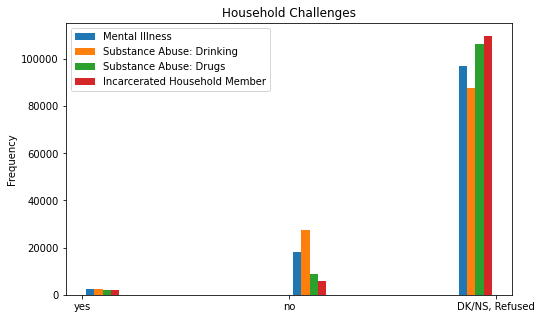

In [28]:
# 1=Yes; 2=No; 7=DK/NS; 9=Refused
plt.figure(figsize=(8, 5))
plt.title('Household Challenges')
plt.hist(x=[brfss_total['ACEDEPRS'], brfss_total['ACEDRINK'],
            brfss_total['ACEDRUGS'], 
            brfss_total['ACEPRISN']])
plt.ylabel('Frequency')
plt.xticks(ticks = [0, 1, 2], labels = ['yes', 'no', 'DK/NS, Refused'])
plt.legend(labels=['Mental Illness', 'Substance Abuse: Drinking', 'Substance Abuse: Drugs', 'Incarcerated Household Member'], loc='best')

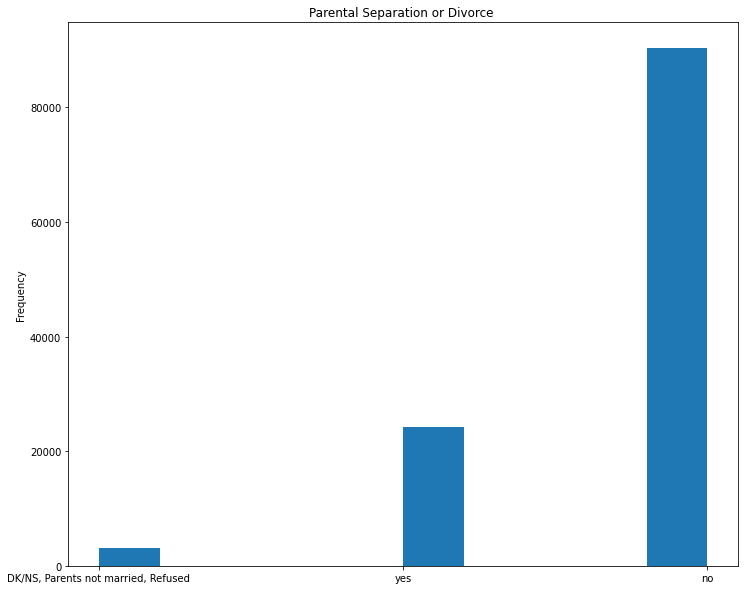

In [33]:
# 1=Yes; 2=No; 8=Parents not married; 7=DK/NS; 9=Refused
plt.figure(figsize=(12, 10))
plt.title('Parental Separation or Divorce ')
plt.hist(x=brfss_total['ACEDIVRC'], histtype='bar');
plt.ylabel('Frequency')
plt.xticks(ticks = [0, 1, 2], labels = ['DK/NS, Parents not married, Refused', 'yes', 'no']);

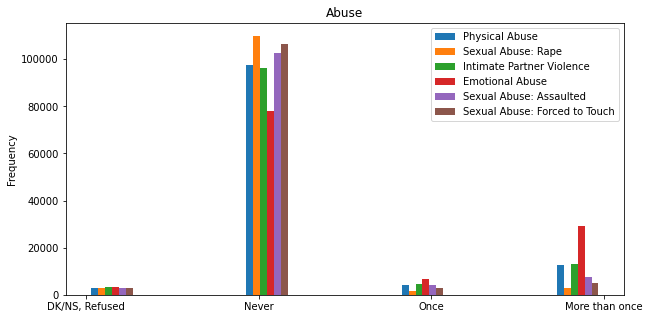

In [32]:
# 1=Never; 2=Once; 3=More than once; 7=DK/NS; 9=Refused 
plt.figure(figsize=(10, 5))
plt.title('Abuse')
plt.hist(x=[brfss_total['ACEHURT'], brfss_total['ACEHVSEX'], 
            brfss_total['ACEPUNCH'], brfss_total['ACESWEAR'],
            brfss_total['ACETOUCH'], brfss_total['ACETTHEM']], histtype='bar')
plt.ylabel('Frequency')
plt.xticks(ticks = [0, 1, 2, 3], labels = ['DK/NS, Refused', 'Never', 'Once', 'More than once'])
plt.legend(labels=['Physical Abuse', 'Sexual Abuse: Rape', 'Intimate Partner Violence', 'Emotional Abuse', 'Sexual Abuse: Assaulted', 'Sexual Abuse: Forced to Touch']);

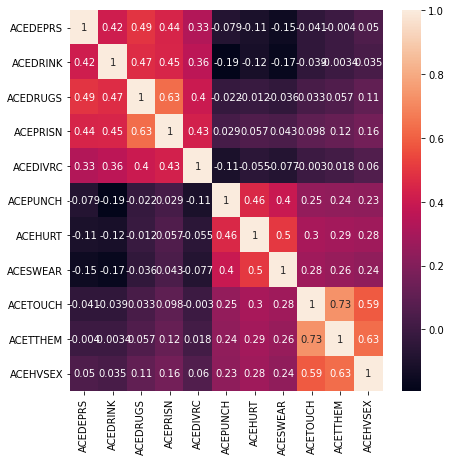

In [35]:
plt.figure(figsize=(7, 7))
sns.heatmap(brfss_total[['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT', 'ACESWEAR', 
                       'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']].corr(), annot=True);